## cVAE convergence evaluation

GANs were not good enough. Switching to VAEs because convergence is demonstrable.

In [1]:
## blob names
cgan_model_name = 'cvae-model.h5'
cvae_simulated_data_name = 'cvae-example-data.pkl'
cvae_fit_stats_name = 'cvae-fit-stats.pkl'

In [2]:
## get data from storage 
!gsutil cp gs://gdax-dnn-tmp-1/cvae-model.h5 .
!gsutil cp gs://gdax-dnn-tmp-1/cvae-example-data.pkl .
!gsutil cp gs://gdax-dnn-tmp-1/cvae-fit-stats.pkl . 
!gsutil cp gs://gdax-dnn-tmp-1/cvae-data.pkl .
!gsutil cp gs://gdax-dnn-tmp-1/cvae-embedding-sample.pkl .

Copying gs://gdax-dnn-tmp-1/cvae-model.h5...
/ [1 files][417.4 KiB/417.4 KiB]                                                
Operation completed over 1 objects/417.4 KiB.                                    
Copying gs://gdax-dnn-tmp-1/cvae-example-data.pkl...
/ [1 files][ 78.3 KiB/ 78.3 KiB]                                                
Operation completed over 1 objects/78.3 KiB.                                     
Copying gs://gdax-dnn-tmp-1/cvae-fit-stats.pkl...
/ [1 files][ 75.1 KiB/ 75.1 KiB]                                                
Operation completed over 1 objects/75.1 KiB.                                     
Copying gs://gdax-dnn-tmp-1/cvae-data.pkl...
/ [1 files][ 33.6 MiB/ 33.6 MiB]                                                
Operation completed over 1 objects/33.6 MiB.                                     
Copying gs://gdax-dnn-tmp-1/cvae-embedding-sample.pkl...
/ [1 files][390.8 KiB/390.8 KiB]                                                
Operation complet

In [3]:
#### Loss should converge to zero

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_stat(stats):
    plt.plot(stats)
    plt.show()
    pass

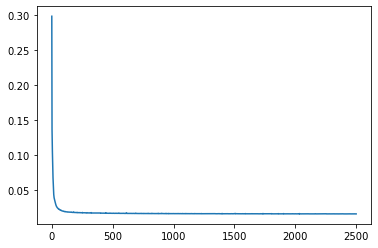

In [5]:
import pickle 
with open(cvae_fit_stats_name, 'rb') as f:
    losses = pickle.load(f)

plot_stat(losses)

In [6]:
losses[-1]

0.015229777391095413

#### Simulated data histrogram should resembe real

In [7]:
## load pickle files 
with open(cvae_simulated_data_name, 'rb') as f:
    cvae_simulated_data = pickle.load(f)
#with open(cvae_fit_stats_name, 'rb') as f: ## does not pickle 
#    cvae_fit_stats = pickle.load(f)

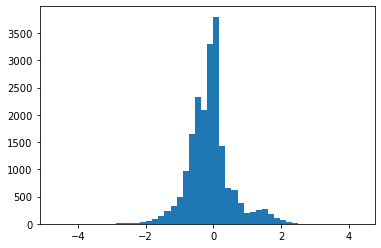

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

def hist(x, num_bins=50, **kwargs):
    plt.hist(x, num_bins, **kwargs)
    plt.show()
    pass

hist(cvae_simulated_data.flatten())

In [9]:
with open('cvae-data.pkl', 'rb') as f:
    cgan_data = pickle.load(f)

In [10]:
import numpy as np
import random 
idx = np.random.choice(cgan_data[0].shape[0], 1000)
x = cgan_data[0][idx,:]

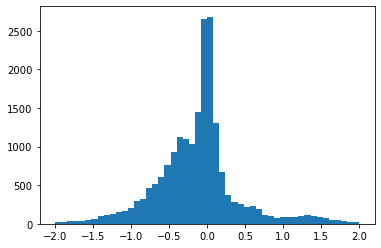

In [11]:
hist(x.flatten(), range=(-2, 2))

#### Embedding should be normally distributed, uncorrelated 

In [12]:
with open('cvae-embedding-sample.pkl', 'rb') as f:
    cvae_embedding_sample = pickle.load(f)

In [13]:
def scatter(x, y):
    plt.scatter(x, y)
    plt.show()
    pass

In [14]:
cvae_embedding_sample.shape

(10000, 10)

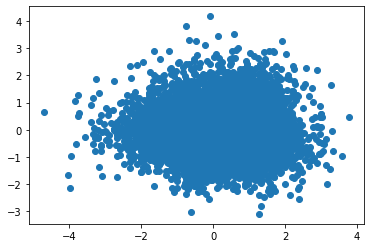

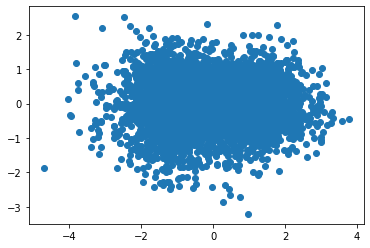

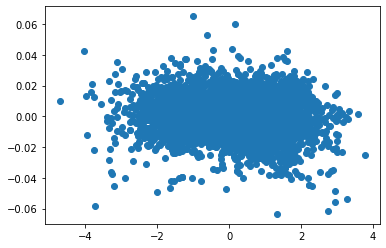

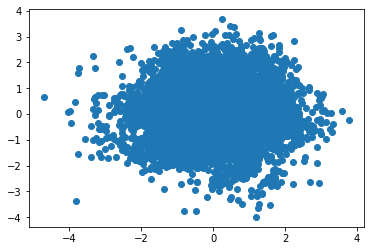

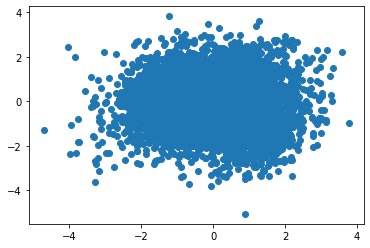

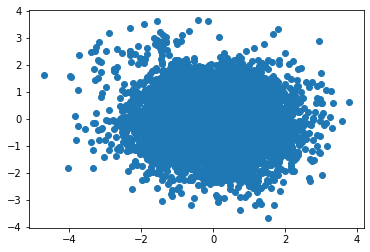

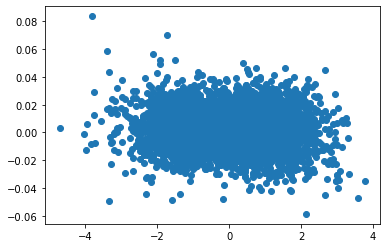

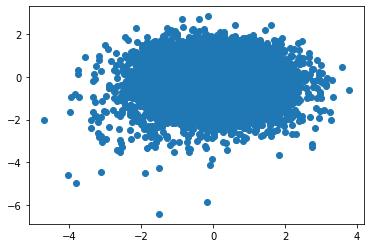

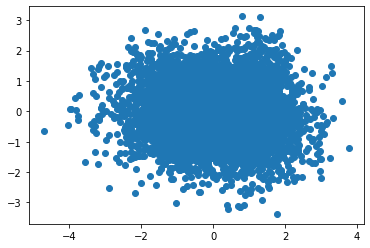

In [21]:
for idx in range(1, cvae_embedding_sample.shape[1]):
    scatter(cvae_embedding_sample[:,0], cvae_embedding_sample[:,idx])